In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [83]:
df = pd.read_excel("premiums_with_life_style.xlsx")
df.head()

,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,Silver,21685
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,Bronze,15984


In [84]:
df.shape

(10000, 15)

In [85]:
df.columns = df.columns.str.replace(" ","_").str.lower()
df.head()

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,Silver,21685
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,Bronze,15984


In [86]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
physical_activity         0
stress_level              0
number_of_dependants      0
bmi_category              0
smoking_status            9
employment_status         7
income_level             18
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [87]:
df.dropna(inplace=True)

In [88]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
physical_activity        0
stress_level             0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [89]:
df.duplicated().sum()

np.int64(0)

In [90]:
# df.drop_duplicates(inplace=True)
# df.duplicated().sum()

In [91]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,9973.000000,9973.000000,9973.000000,9973.000000
mean,41.319362,3.195628,23.382232,19503.816705
std,58.044687,21.679565,32.334811,8898.079736
min,18.000000,0.000000,1.000000,3582.000000
25%,24.000000,0.000000,6.000000,11774.000000
50%,37.000000,2.000000,16.000000,19314.000000
75%,50.000000,3.000000,31.000000,26500.000000
max,1178.000000,456.000000,960.000000,45854.000000


In [92]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

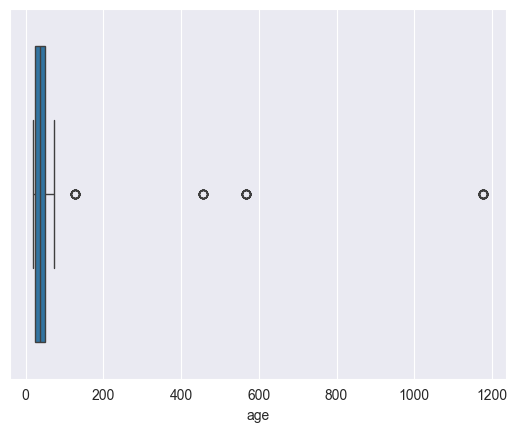

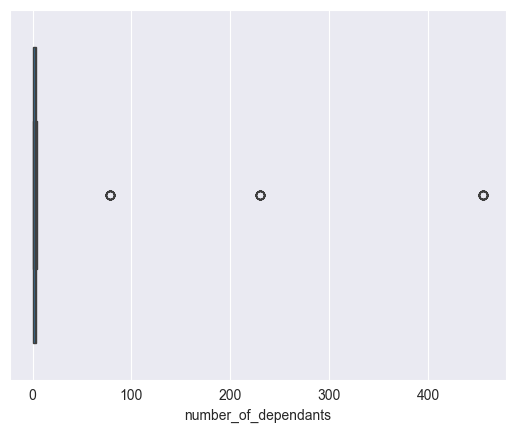

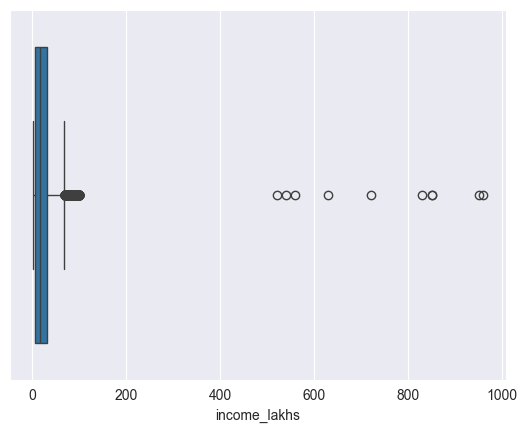

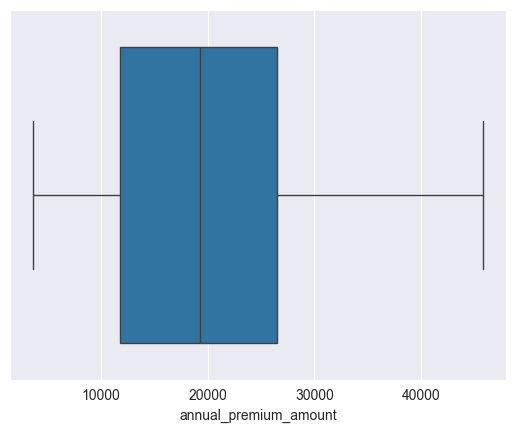

In [93]:
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [94]:
df[df['age']>100]['age'].unique()

array([ 128, 1178,  567,  456])

In [95]:
df1 = df[df.age<=100]
df1.age.describe()

count    9915.000000
mean       37.743621
std        13.975462
min        18.000000
25%        24.000000
50%        37.000000
75%        50.000000
max        72.000000
Name: age, dtype: float64

In [96]:
def get_iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

lower, upper = get_iqr_bounds(df1['income_lakhs'])
lower, upper

(-31.5, 68.5)

In [97]:
df1[df1.income_lakhs>upper].shape

(697, 15)

In [98]:
quantile_thresold = df1.income_lakhs.quantile(0.999)
quantile_thresold

np.float64(136.12000000048283)

In [99]:
df1[df1.income_lakhs>quantile_thresold].shape

(10, 15)

In [100]:
df2 = df1[df1.income_lakhs<=quantile_thresold].copy()
df2.shape

(9905, 15)

In [101]:
df2.number_of_dependants.describe()

count    9905.000000
mean        3.205553
std        21.753158
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max       456.000000
Name: number_of_dependants, dtype: float64

<Axes: xlabel='number_of_dependants', ylabel='Count'>

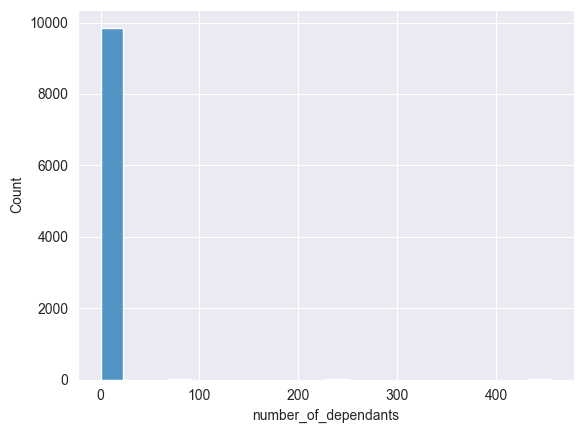

In [102]:
sns.histplot(df2.number_of_dependants,bins=20)

In [103]:
dependant_thresold = df2.number_of_dependants.quantile(0.99)
dependant_thresold

np.float64(5.0)

In [104]:
df3 = df2[df2.number_of_dependants<=dependant_thresold].copy()
df3.number_of_dependants.describe()

count    9858.000000
mean        1.919963
std         1.503027
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: number_of_dependants, dtype: float64

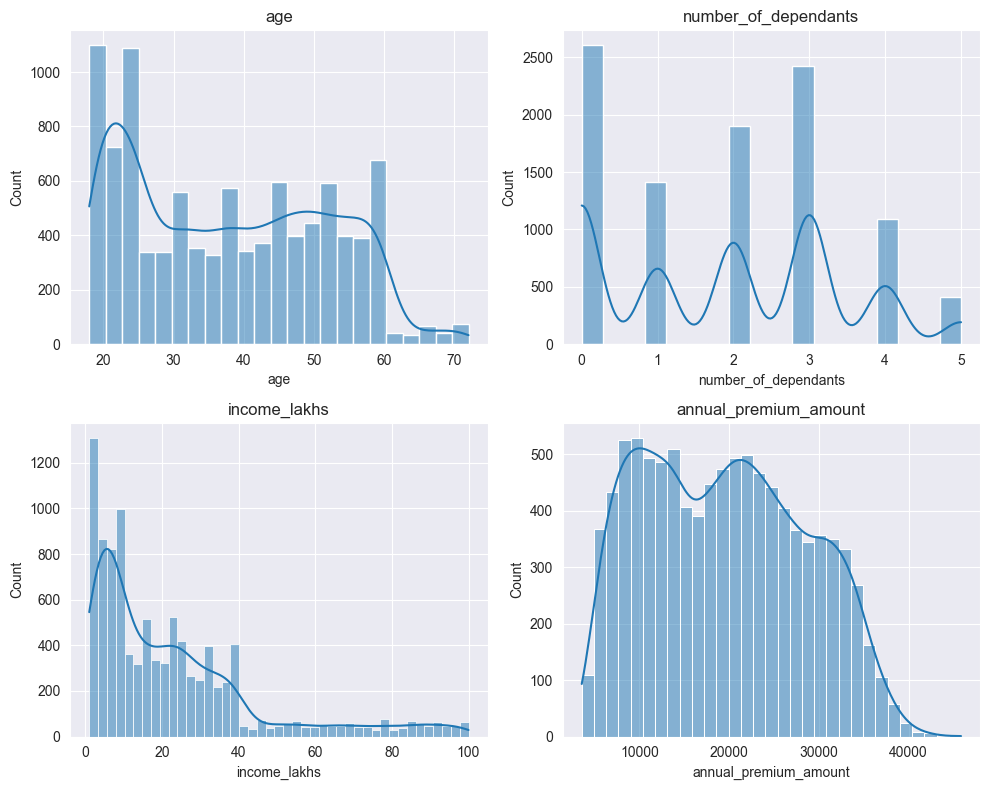

In [105]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))  # Adjust the size as necessary

for i, column in enumerate(numeric_columns):
    ax = axs[i//2, i%2]  # Determines the position of the subplot in the grid
    sns.histplot(df3[column], kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [106]:
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

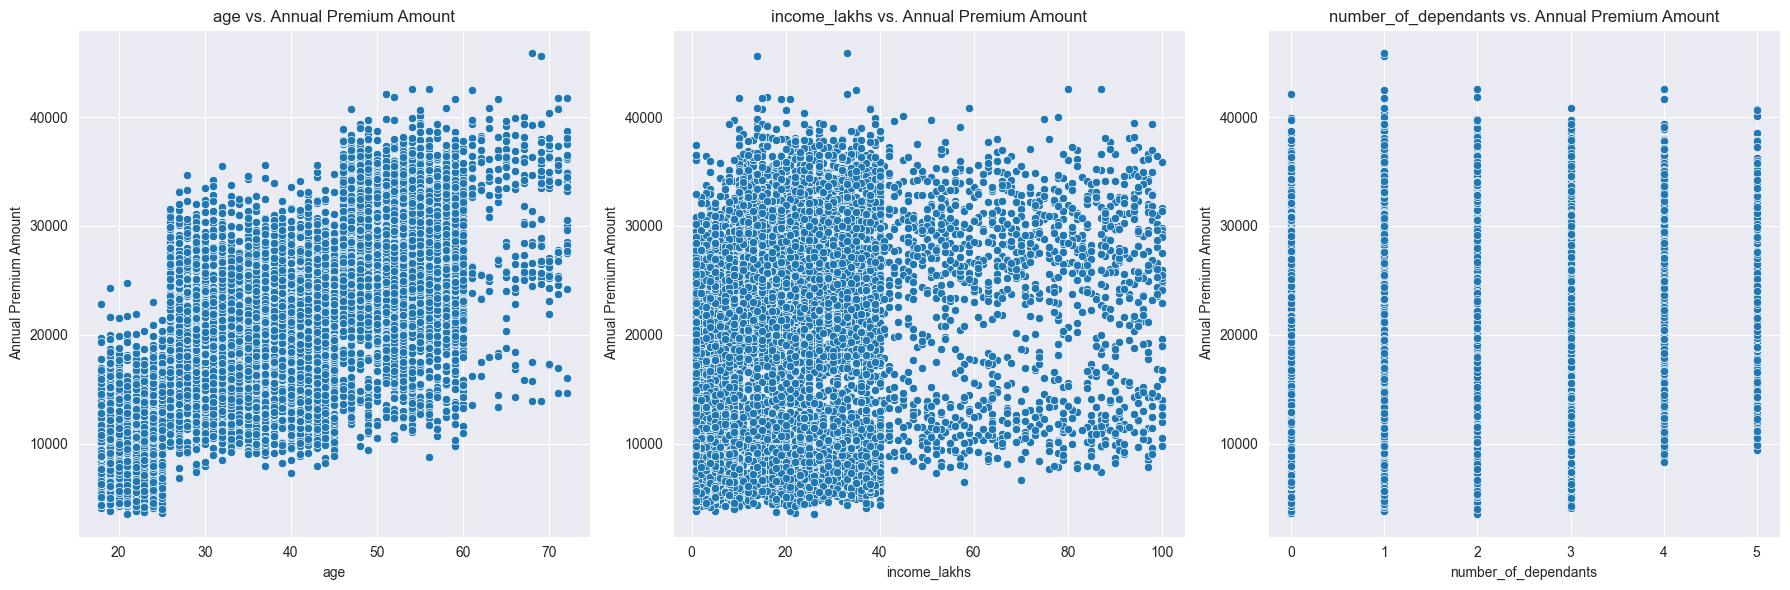

In [107]:
numeric_features = ['age', 'income_lakhs', 'number_of_dependants']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 6))  # Adjust figure size as necessary

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df3[column], y=df3['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs. Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjust layout
plt.show()

In [108]:
categorical_cols = ['gender', 'region', 'marital_status', 'physical_activity', 'stress_level', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan']

for col in categorical_cols:
    print(col, ":", df3[col].unique())

gender : ['Female' 'Male']
region : ['Southeast' 'Northeast' 'Southwest' 'Northwest']
marital_status : ['Unmarried' 'Married']
physical_activity : ['Medium' 'Low' 'High']
stress_level : ['Medium' 'High' 'Low']
bmi_category : ['Normal' 'Overweight' 'Obesity' 'Underweight']
smoking_status : ['No Smoking' 'Occasional' 'Regular']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['25L - 40L' '10L - 25L' '<10L' '> 40L']
medical_history : ['High blood pressure' 'No Disease' 'Thyroid'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid' 'Diabetes'
 'Heart disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease']
insurance_plan : ['Gold' 'Silver' 'Bronze']


In [109]:
pct_count = df3['gender'].value_counts(normalize=True)*100
pct_count

gender
Female    59.870156
Male      40.129844
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

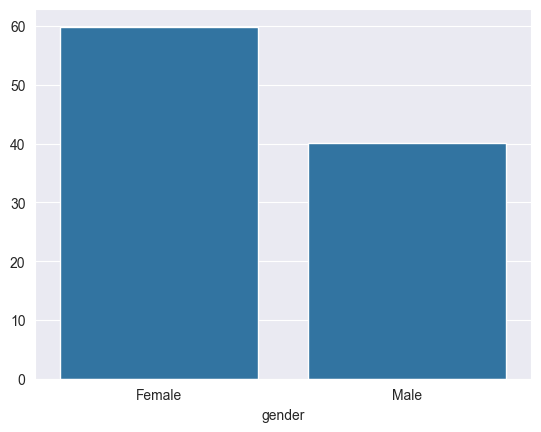

In [110]:
sns.barplot(x=pct_count.index, y=pct_count.values)

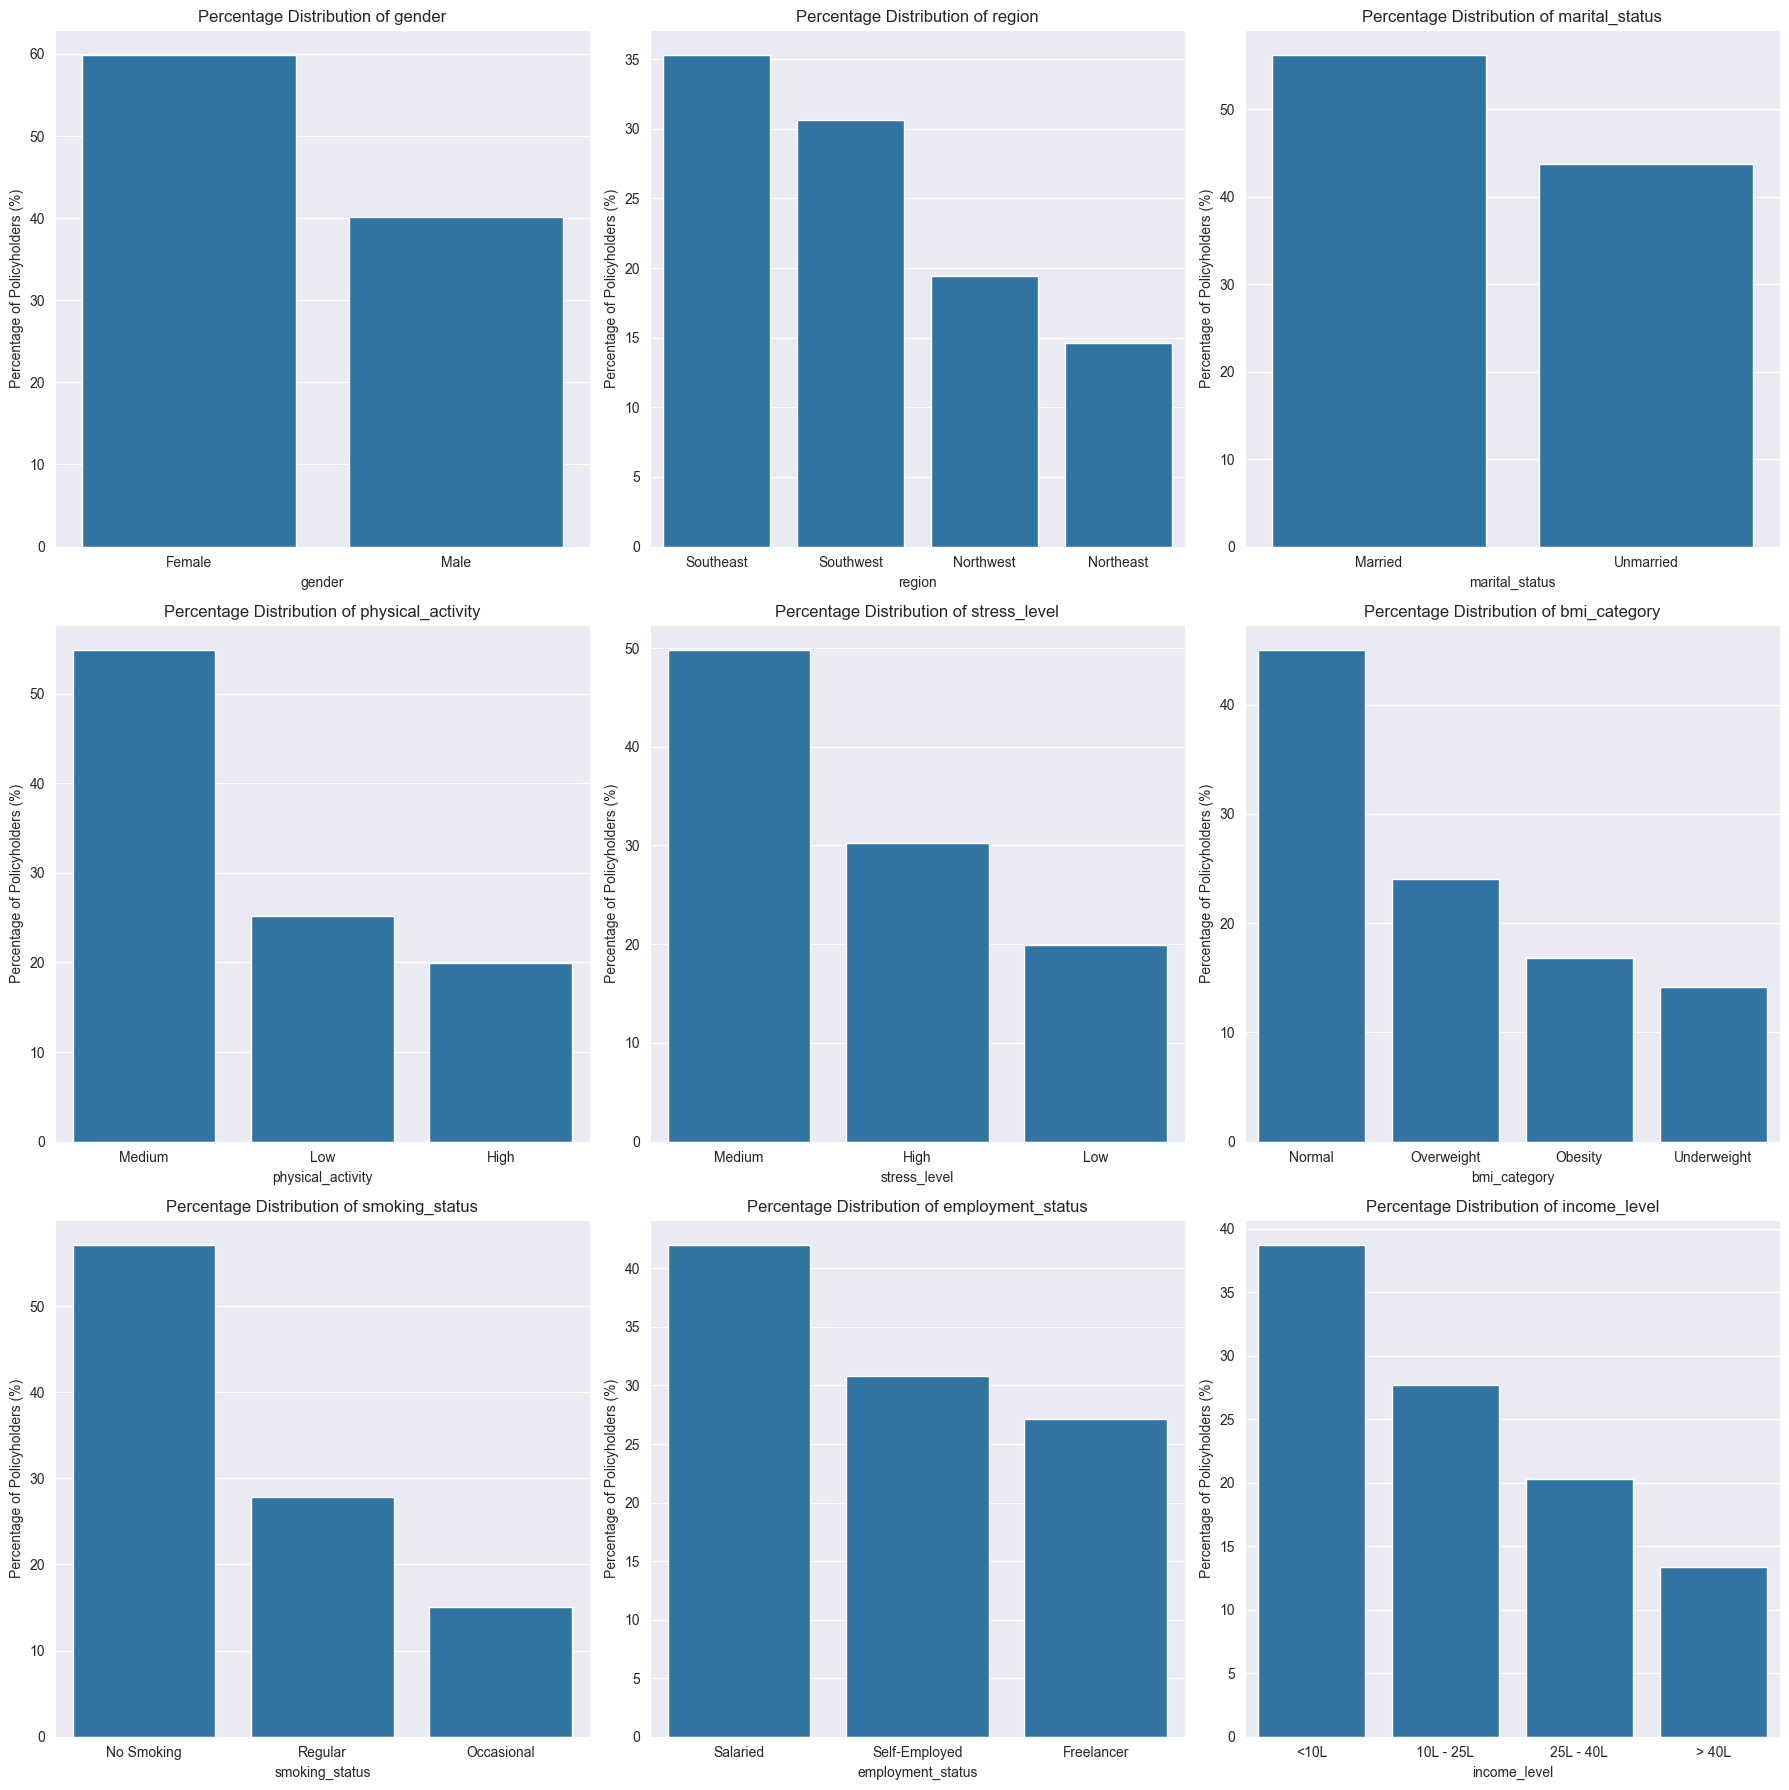

In [111]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # Adjust figure size as necessary
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

for ax, column in zip(axes, categorical_cols):
    # Calculate the percentage distribution of each category
    category_counts = df3[column].value_counts(normalize=True) * 100  # normalize=True gives the relative frequencies

    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(column)  # Set xlabel to the column name for clarity

plt.tight_layout()  # Adjusts plot parameters for better fit in the figure window
plt.show()

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L          822   909     998
25L - 40L          533   733     733
<10L              2266   184    1366
> 40L               55   788     471


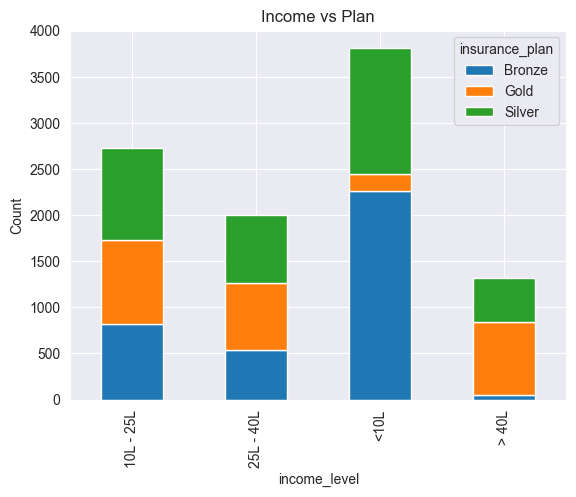

In [112]:
# Cross-tabulation of gender and smoking status
crosstab = pd.crosstab(df3['income_level'], df3['insurance_plan'])
print(crosstab)

# Plotting the crosstab
crosstab.plot(kind='bar', stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

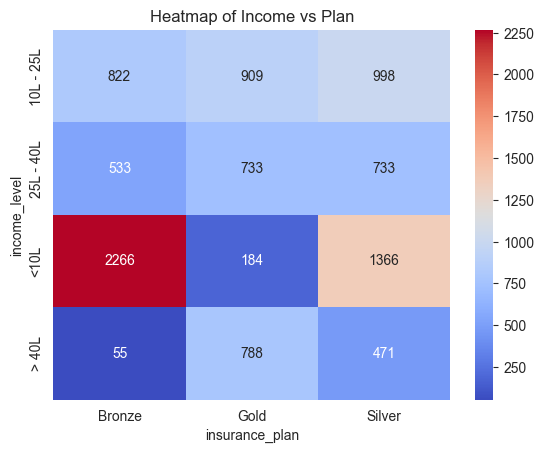

In [113]:
sns.heatmap(crosstab, annot=True, cmap='coolwarm',fmt="d")
plt.title('Heatmap of Income vs Plan')
plt.show()

In [114]:
# Define the risk scores for each condition
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

df3[['disease1', 'disease2']] = df3['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df3['disease1'].fillna('none', inplace=True)
df3['disease2'].fillna('none', inplace=True)
df3['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df3['total_risk_score'] += df3[disease].map(risk_scores)

# Normalize the risk score to a range of 0 to 1
max_score = df3['total_risk_score'].max()
min_score = df3['total_risk_score'].min()
df3['normalized_risk_score'] = (df3['total_risk_score'] - min_score) / (max_score - min_score)
df3.head()

/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_46788/1908651664.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['disease1'].fillna('none', inplace=True)
/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_46788/1908651664.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944,high blood pressure,none,6,0.428571
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108,no disease,none,0,0.000000
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459,no disease,none,0,0.000000
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,Silver,21685,thyroid,none,5,0.357143
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,Bronze,15984,high blood pressure,heart disease,14,1.000000


In [115]:
def calculate_life_style_risk(row):
    physical_activity_risk_score = {
        "High": 0,
        "Medium": 1,
        "Low": 4
    }
    stress_risk_score = {
        "High": 4,
        "Medium": 1,
        "Low": 0
    }
    life_style_risk = physical_activity_risk_score[row['physical_activity']] + stress_risk_score[row['stress_level']]
    return life_style_risk

df3['lifestyle_risk_score'] = df3.apply(calculate_life_style_risk, axis=1)

In [116]:
df3.head()

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score,lifestyle_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944,high blood pressure,none,6,0.428571,2
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108,no disease,none,0,0.000000,8
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459,no disease,none,0,0.000000,5
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,Silver,21685,thyroid,none,5,0.357143,1
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,Bronze,15984,high blood pressure,heart disease,14,1.000000,5


<Axes: xlabel='lifestyle_risk_score', ylabel='Count'>

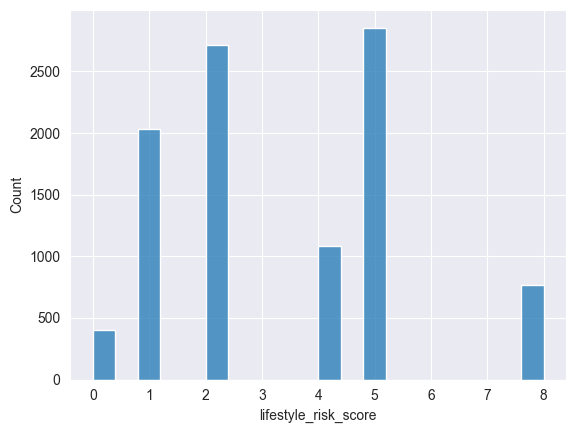

In [117]:
sns.histplot(df3.lifestyle_risk_score, bins=20)

In [118]:
df3['insurance_plan'] = df3['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})

In [119]:
df3.head()

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score,lifestyle_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,3,27944,high blood pressure,none,6,0.428571,2
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,2,21108,no disease,none,0,0.000000,8
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,1,8459,no disease,none,0,0.000000,5
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,2,21685,thyroid,none,5,0.357143,1
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,1,15984,high blood pressure,heart disease,14,1.000000,5


In [120]:
df3.income_level.unique()

array(['25L - 40L', '10L - 25L', '<10L', '> 40L'], dtype=object)

In [121]:
df3['income_level'] = df3['income_level'].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})

In [122]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df4 = pd.get_dummies(df3, columns=nominal_cols, drop_first=True, dtype=int)
df4.head()

,age,physical_activity,stress_level,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,56,Medium,Medium,2,3,37,High blood pressure,3,27944,high blood pressure,...,1,0,1,0,0,0,0,0,0,1
1,38,Low,High,5,2,10,No Disease,2,21108,no disease,...,0,0,0,0,1,0,1,0,0,0
2,18,Medium,High,0,1,9,No Disease,1,8459,no disease,...,0,1,1,0,0,0,0,0,0,0
3,55,High,Medium,3,1,9,Thyroid,2,21685,thyroid,...,0,0,0,0,1,0,1,0,1,0
4,22,Medium,High,2,2,13,High blood pressure & Heart disease,1,15984,high blood pressure,...,1,0,1,0,0,0,0,1,0,1


In [123]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9858 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              9858 non-null   int64  
 1   physical_activity                9858 non-null   object 
 2   stress_level                     9858 non-null   object 
 3   number_of_dependants             9858 non-null   int64  
 4   income_level                     9858 non-null   int64  
 5   income_lakhs                     9858 non-null   int64  
 6   medical_history                  9858 non-null   object 
 7   insurance_plan                   9858 non-null   int64  
 8   annual_premium_amount            9858 non-null   int64  
 9   disease1                         9858 non-null   object 
 10  disease2                         9858 non-null   object 
 11  total_risk_score                 9858 non-null   int64  
 12  normalized_risk_score    

In [124]:
df5 = df4.drop(['medical_history','disease1', 'disease2', 'total_risk_score','physical_activity','stress_level'], axis=1)
df5.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,lifestyle_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,56,2,3,37,3,27944,0.428571,2,0,0,1,0,1,0,0,0,0,0,0,1
1,38,5,2,10,2,21108,0.000000,8,0,0,0,0,0,0,1,0,1,0,0,0
2,18,0,1,9,1,8459,0.000000,5,0,0,0,1,1,0,0,0,0,0,0,0
3,55,3,1,9,2,21685,0.357143,1,1,0,0,0,0,0,1,0,1,0,1,0
4,22,2,2,13,1,15984,1.000000,5,1,0,1,0,1,0,0,0,0,1,0,1


In [125]:
df5.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'normalized_risk_score',
       'lifestyle_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

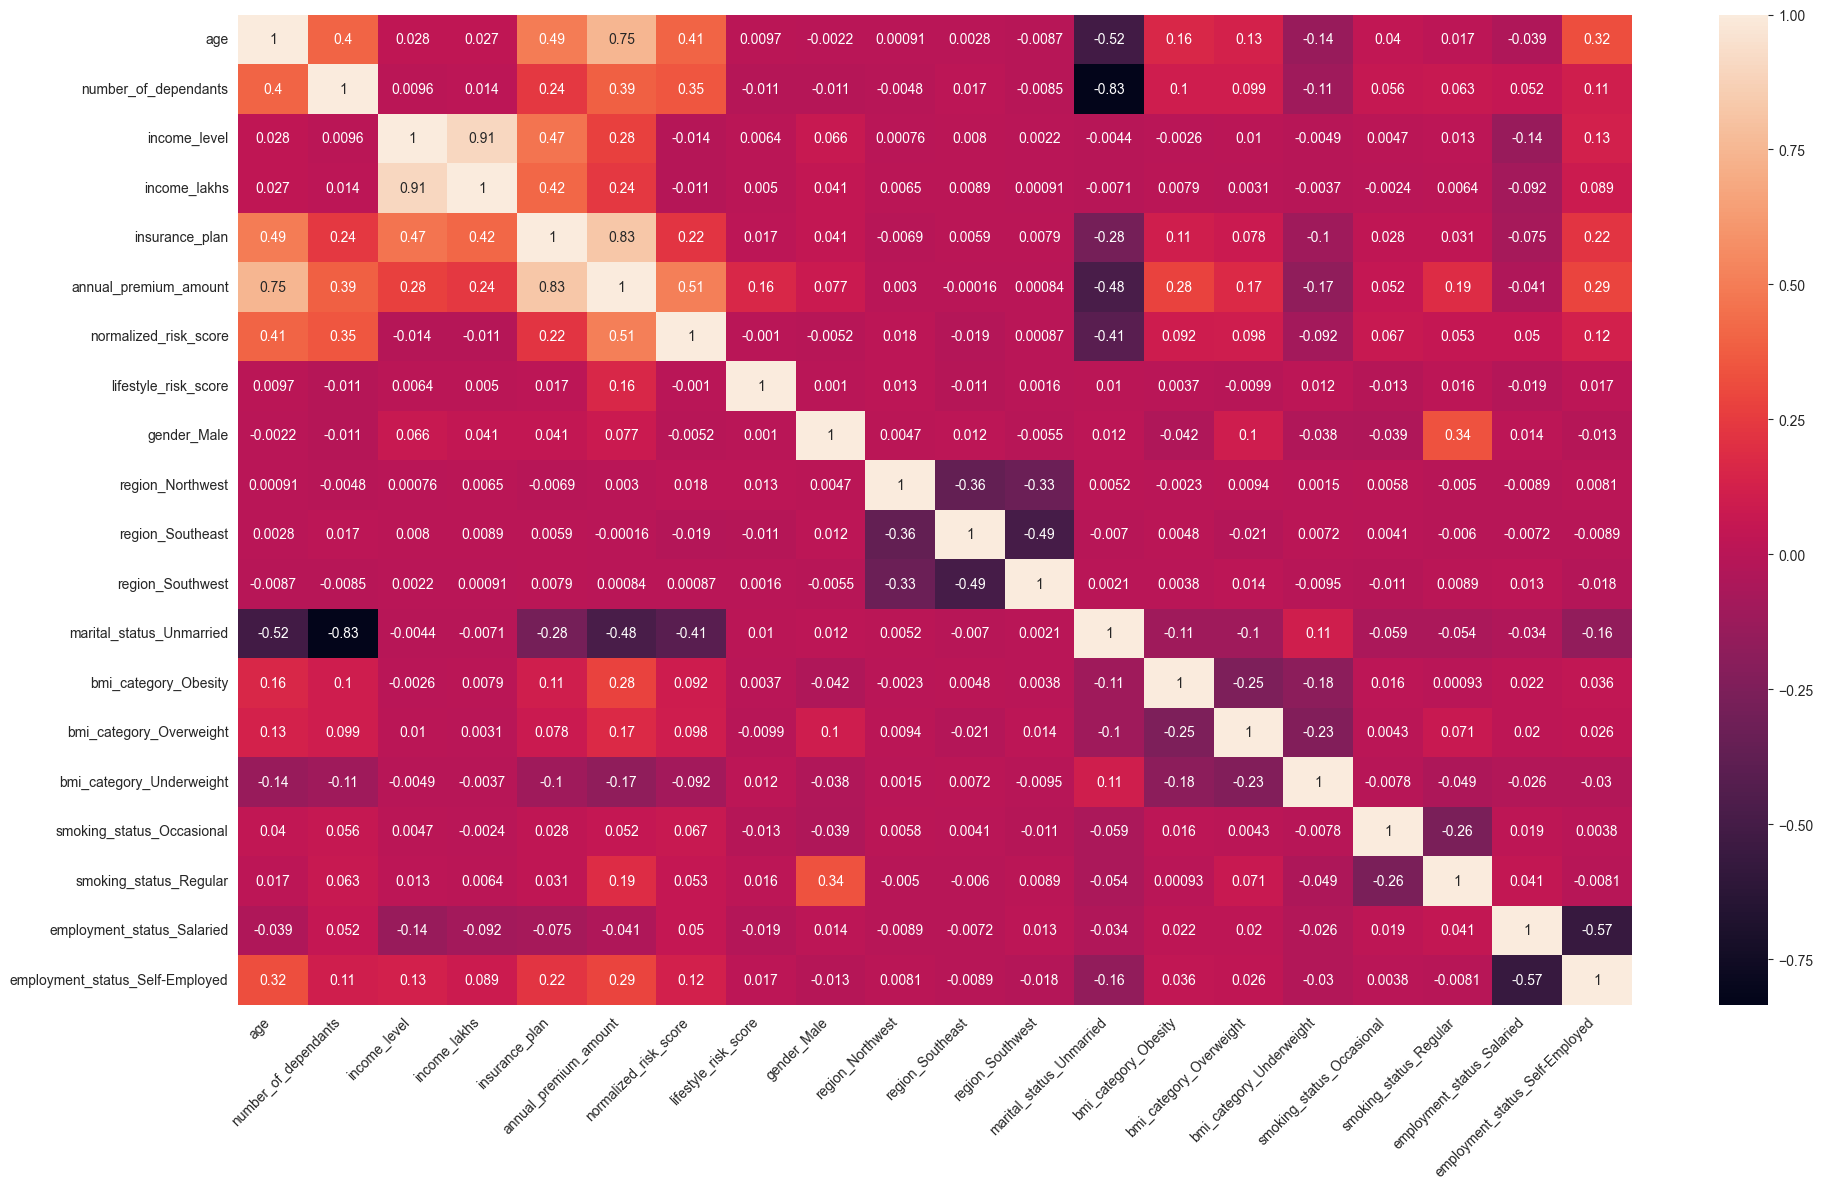

In [126]:
cm = df5.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [127]:
X = df5.drop('annual_premium_amount', axis='columns')
y = df5['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan', 'lifestyle_risk_score']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,lifestyle_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000
mean,0.366014,0.383993,0.360756,0.219027,0.446135,0.326537,0.408349,0.401298,0.194664,0.353013,0.306452,0.437716,0.167985,0.240414,0.141712,0.150030,0.278657,0.420065,0.308176
std,0.258820,0.300605,0.352198,0.226801,0.395765,0.279083,0.268302,0.490186,0.395962,0.477931,0.461043,0.496131,0.373872,0.427356,0.348773,0.357119,0.448361,0.493594,0.461763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.050505,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.351852,0.400000,0.333333,0.151515,0.500000,0.428571,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.592593,0.600000,0.666667,0.303030,1.000000,0.428571,0.625000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [129]:
calculate_vif(X)

,Column,VIF
0,age,5.541063
1,number_of_dependants,5.320401
2,income_level,12.548788
3,income_lakhs,10.947288
4,insurance_plan,4.147071
5,normalized_risk_score,3.001706
6,lifestyle_risk_score,3.110913
7,gender_Male,1.910118
8,region_Northwest,2.082989
9,region_Southeast,2.952809


In [130]:
calculate_vif(X.drop('income_level', axis="columns"))

,Column,VIF
0,age,5.488217
1,number_of_dependants,5.306542
2,income_lakhs,2.450579
3,insurance_plan,3.875312
4,normalized_risk_score,3.001684
5,lifestyle_risk_score,3.110034
6,gender_Male,1.901611
7,region_Northwest,2.082813
8,region_Southeast,2.951877
9,region_Southwest,2.678296


In [131]:
# we will drop income_lakhs due to high VIF value
X_reduced = X.drop('income_level', axis="columns")

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6900, 18), (2958, 18), (6900,), (2958,))

In [133]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

test_score = model_lr.score(X_test, y_test)
train_score = model_lr.score(X_train, y_train)

train_score, test_score

(0.9586426437876246, 0.9572516785678009)

In [134]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)

print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE:  3320807.9034878304 RMSE:  1822.3083996645107


In [135]:
np.set_printoptions(suppress=True, precision=6)
print(model_lr.coef_)

[10675.837861  -671.110352  -708.275605 13311.846824  6521.438689
  4724.386632    11.961022    77.061876    88.325309    -9.701258
  -820.804958  4166.09646   2119.215673   413.650051  1159.508746
  3116.482686    17.894652   382.995584]


In [136]:
feature_importance = model_lr.coef_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

coef_df

,Coefficients
marital_status_Unmarried,-820.804958
income_lakhs,-708.275605
number_of_dependants,-671.110352
region_Southwest,-9.701258
gender_Male,11.961022
employment_status_Salaried,17.894652
region_Northwest,77.061876
region_Southeast,88.325309
employment_status_Self-Employed,382.995584
bmi_category_Underweight,413.650051


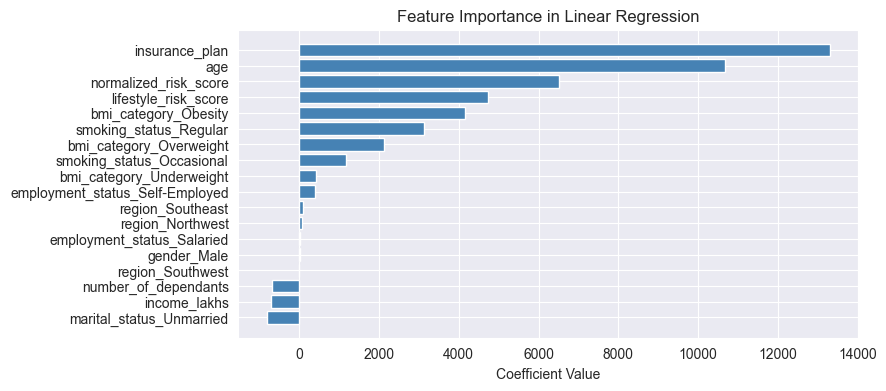

In [137]:
# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [138]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=20, max_depth=3)
model_xgb.fit(X_train, y_train)
model_xgb.score(X_test, y_test)

0.9886000156402588

In [139]:
y_pred = model_xgb.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("XGBoost Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

XGBoost Regression ==> MSE:  885582.3233142267 RMSE:  941.0538365652768


In [140]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = GridSearchCV(model_xgb, param_grid, cv=3, scoring='r2')
random_search.fit(X_train, y_train)
random_search.best_score_

np.float64(0.994385282198588)

In [141]:
random_search.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}

In [142]:
best_model = random_search.best_estimator_
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [143]:
feature_importance = best_model.feature_importances_
# print(feature_importance)

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

coef_df

,Coefficients
region_Southwest,0.000130
region_Northwest,0.000134
employment_status_Self-Employed,0.000141
employment_status_Salaried,0.000171
number_of_dependants,0.000190
region_Southeast,0.000213
marital_status_Unmarried,0.000218
gender_Male,0.000243
income_lakhs,0.000251
bmi_category_Underweight,0.001844


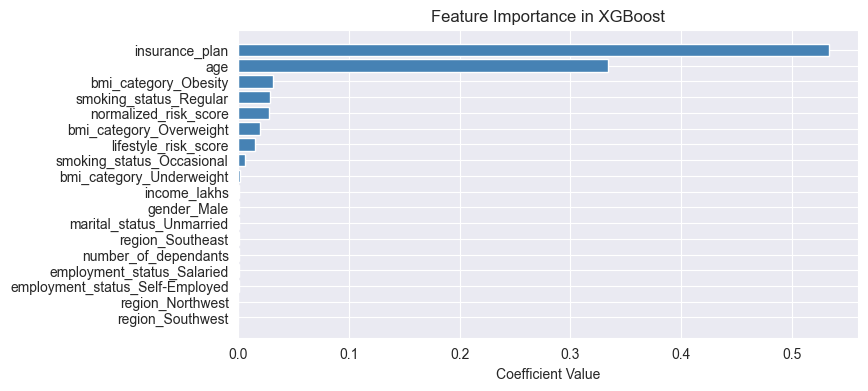

In [144]:
# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

In [145]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = (residuals / y_test) * 100

results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'diff_pct': residuals_pct
})

results_df

,actual,predicted,diff,diff_pct
3021,13354,12137.140625,-1216.859375,-9.112321
6049,10701,11516.718750,815.718750,7.622827
6146,15146,16542.726562,1396.726562,9.221752
6418,8743,9431.764648,688.764648,7.877898
1537,27887,26957.414062,-929.585938,-3.333402
...,...,...,...,...
7154,23328,23338.048828,10.048828,0.043076
6569,28386,28268.291016,-117.708984,-0.414673
1244,25068,24029.738281,-1038.261719,-4.141781
8910,6935,7679.333984,744.333984,10.733006


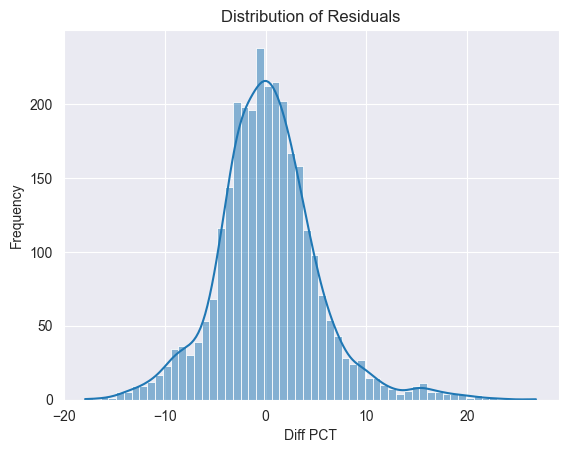

In [146]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [147]:
extreme_error_threshold = 10  # You can adjust this threshold based on your domain knowledge or requirements
extreme_results_df = results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]
extreme_results_df.head()

,actual,predicted,diff,diff_pct
7800,9632,8532.659180,-1099.340820,-11.413422
9814,6655,5707.668945,-947.331055,-14.234877
9970,6484,7146.535645,662.535645,10.218008
3562,5987,6722.224121,735.224121,12.280343
6882,14831,13075.394531,-1755.605469,-11.837405


In [148]:
extreme_results_df.shape

(170, 4)

In [149]:
extreme_errors_pct = extreme_results_df.shape[0]*100/X_test.shape[0]
extreme_errors_pct

5.747126436781609